In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


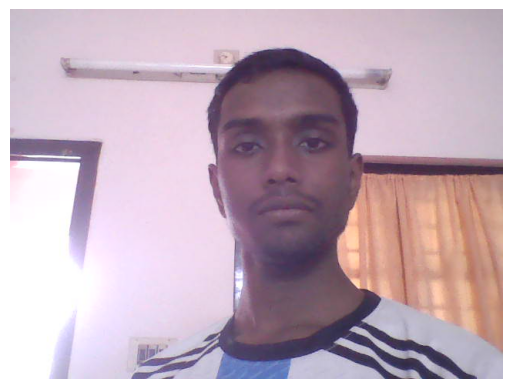

In [110]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cap.release()

# Convert BGR to RGB for proper display
image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [111]:
# Get image dimensions
h, w, c = image_rgb.shape

# Flatten to (num_pixels, 3)
pixels = image_rgb.reshape(-1, 3)


In [112]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(pixels)


In [113]:
# Create a copy of pixels
segmented_pixels = pixels.copy()

# Mask cluster 0 with white
segmented_pixels[labels == 0] = [255, 255, 255]

# Reshape back to original dimensions
segmented_image = segmented_pixels.reshape(h, w, c)


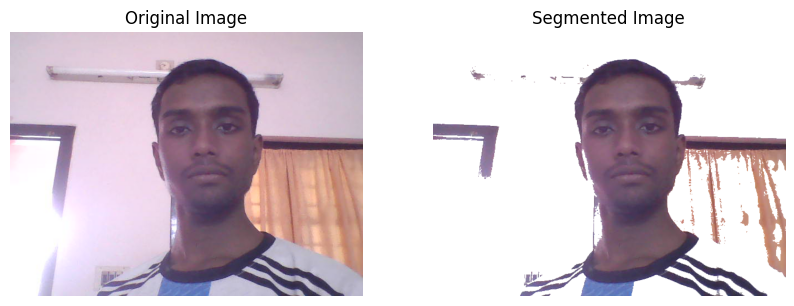

In [114]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Segmented Image")
plt.imshow(segmented_image)
plt.axis('off')

plt.show()
